# Zipf's Law

George Kingsley Zipf was a linguist who noticed an interesting phenomenon regarding the frequencies of words in a corpus (collection of documents). For almost any corpus the frequency of the occurrence of a word (i.e. how many times it occurs) is inversely proportional to the word frequency rank in the corpus:

<img src="zipf_law.png">

This phenomenon tends to show up not only in text data, but in a variety of naturally occurring data ranging from search engines queries to connections in a social networks. This phenomena is so predominant that is has be coined Zipf’s law.  

In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from nltk.corpus import reuters 

In [3]:
#Place all the words in the list
reuters_words = [w.lower() for w in reuters.words()] 

In [10]:
#printing some sample words
reuters_words[0:10]

['asian', 'exporters', 'fear', 'damage', 'from', 'u', '.', 's', '.-', 'japan']

In [11]:
print("Number of words in the list {}".format(len(reuters_words)))
print("Number of Unique words in the list {}".format(len(list(set(reuters_words)))))

Number of words in the list 1720901
Number of Unique words in the list 31078


## Simple way to do word frequency 

In [12]:
""" 
A counter is just like a dictionary in python. It is a very import tool to know about for NLP purposes. It keeps a track
of the count of each element.
Elements in the counter are based on key and value. Key represents the words and values would be the count of the word.
""" 
from collections import Counter
counts = Counter(reuters_words)

### Print the most frequently occuring words in the Corpus

In [13]:
counts.most_common(10)

[('.', 94687),
 (',', 72360),
 ('the', 69277),
 ('of', 36779),
 ('to', 36400),
 ('in', 29253),
 ('and', 25648),
 ('said', 25383),
 ('a', 25103),
 ('mln', 18623)]

In [14]:
word = []
word_count = []
for key,value in counts.most_common():
    word.append(key)
    word_count.append(value)
    if len(word_count) >= 500:
        break

# Visualizing the Zipf's law for the top 500 words

Text(0.5,0,'Top 500 most frequent words')

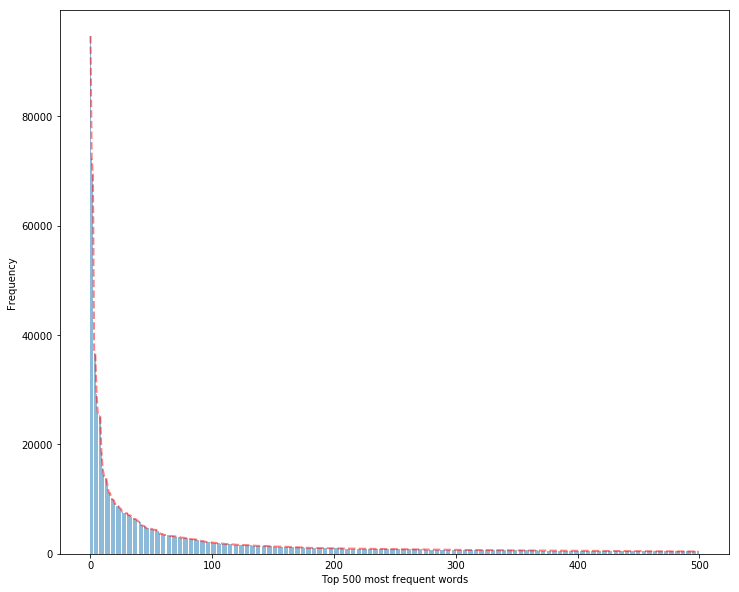

In [80]:
y_pos = np.arange(len(word_count))
plt.figure(figsize=(12,10))
plt.bar(y_pos, word_count, align='center', alpha=0.5)
plt.plot(y_pos, word_count, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Top 500 most frequent words')

# Plotting the top 50 words with word displayed on the x axis

Text(0.5,1,'Sample Frequency Plot')

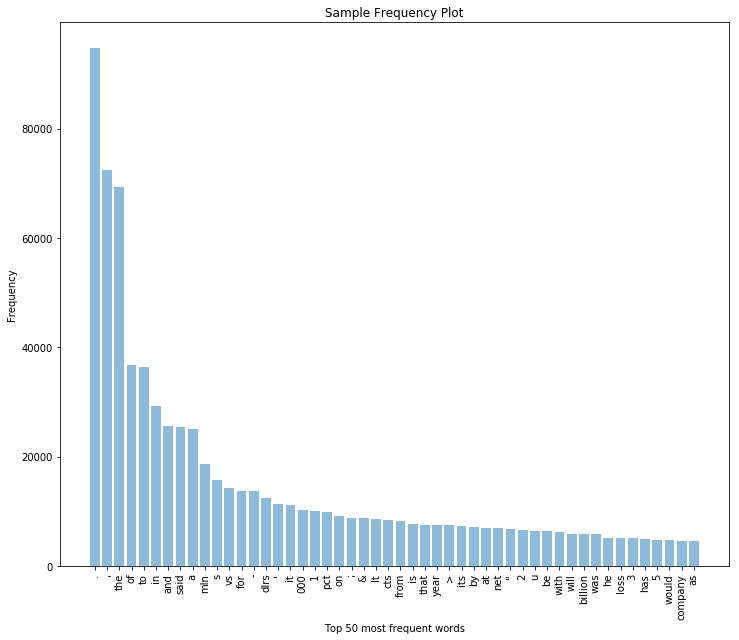

In [81]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, word_count[0:50], align='center', alpha=0.5)
plt.xticks(y_pos, word[0:50],rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 most frequent words')
plt.title('Sample Frequency Plot')

## Visualizing the 2012 Obama and Romney debate, moderated by Lehrer

In [82]:
# function for loading data
def load_data():
    # declaring final strings to return
    obama = ''
    romney = ''
    lehrer = ''
    
    # file reading
    debate = open('debate.txt', 'r')
    index = 4
    statements = [[], [], []]
    for line in debate:
        if line[0] == '(' or line == '\n':
            continue
        if 'OBAMA:' in line:
            index = 0
        if 'ROMNEY:' in line:
            index = 1
        if 'LEHRER:' in line:
            index = 2
        if index < 3:
            statements[index].append(line)
    for line in statements[0]:
        obama += line
    for line in statements[1]:
        romney += line
    for line in statements[2]:
        lehrer += line
    obama = obama.replace('OBAMA: ', '')
    obama = obama.replace('\n', ' ')
    romney = romney.replace('ROMNEY: ', '')
    romney = romney.replace('\n', ' ')
    lehrer = lehrer.replace('LEHRER: ', '')
    lehrer = lehrer.replace('\n', ' ')
    lehrer = lehrer[:-80]
    return obama, romney, lehrer

# Loading data from debate.txt
obama, romney, lehrer = load_data()

In [83]:
# Performing some preprocessing
# Removing punctuation
import re
punctuation = re.compile('\W')
def remove_punctuation(string):
    return punctuation.sub(' ', string)
obama_unpunctuated = remove_punctuation(obama)
romney_unpunctuated = remove_punctuation(romney)
lehrer_unpunctuated = remove_punctuation(lehrer)

# Word tokenizing
from nltk import word_tokenize
obama_words = word_tokenize(obama_unpunctuated)
romney_words = word_tokenize(romney_unpunctuated)
lehrer_words = word_tokenize(lehrer_unpunctuated)

In [84]:
# Word counters for each speaker
counts_obama = Counter(obama_words)
counts_romney = Counter(romney_words)
counts_lehrer = Counter(lehrer_words)

In [85]:
# Declaring placeholders for storing frequent words for each speaker
word_obama = []
word_count_obama = []
word_romney = []
word_count_romney = []
word_lehrer = []
word_count_lehrer = []

# Getting the top most used words from each speaker
for key,value in counts_obama.most_common():
    word_obama.append(key)
    word_count_obama.append(value)
    if len(word_count_obama) >= 50:
        break
for key,value in counts_romney.most_common():
    word_romney.append(key)
    word_count_romney.append(value)
    if len(word_count_romney) >= 50:
        break
for key,value in counts_lehrer.most_common():
    word_lehrer.append(key)
    word_count_lehrer.append(value)
    if len(word_count_lehrer) >= 50:
        break

Text(0.5,1,"Obama's Top 50 Frequent Words")

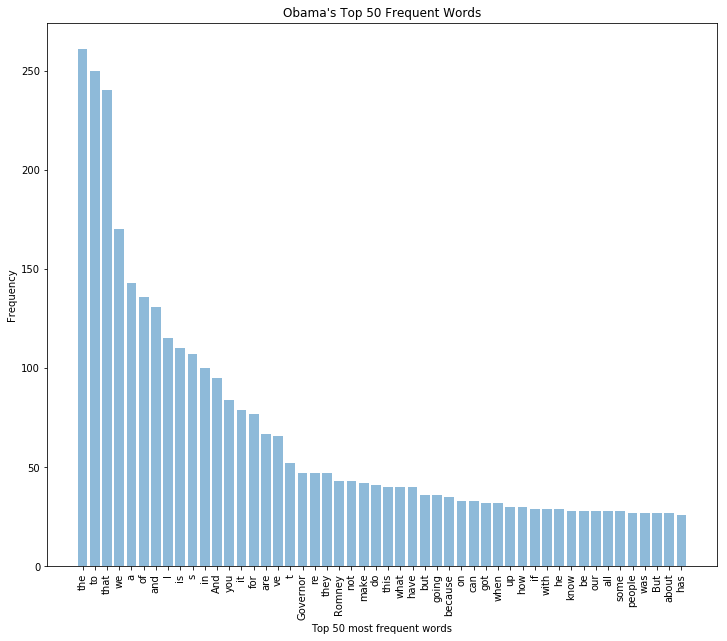

In [86]:
# Plotting top 50 most frequent words by each speaker
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, word_count_obama, align='center', alpha=0.5)
plt.xticks(y_pos, word_obama, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 most frequent words')
plt.title('Obama\'s Top 50 Frequent Words')

Text(0.5,1,"Romney's Top 50 Frequent Words")

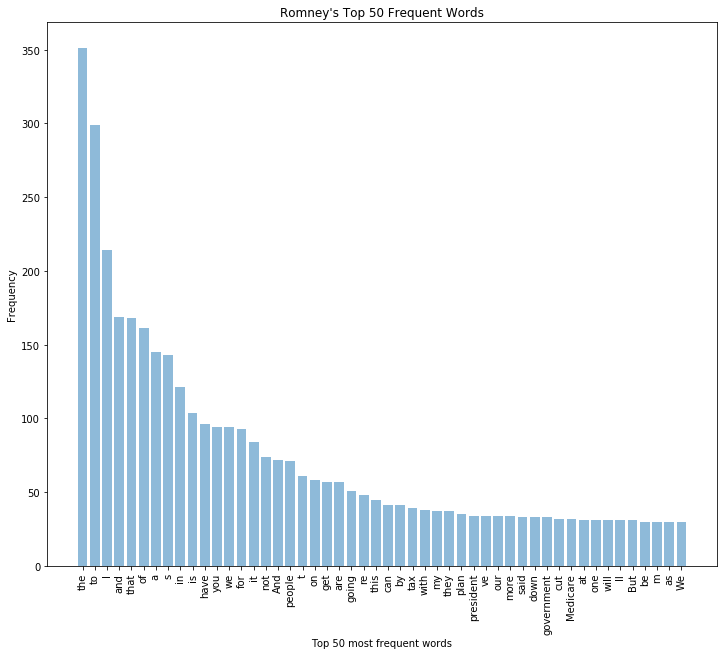

In [87]:
# Plotting top 50 most frequent words by each speaker
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, word_count_romney, align='center', alpha=0.5)
plt.xticks(y_pos, word_romney, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 most frequent words')
plt.title('Romney\'s Top 50 Frequent Words')

Text(0.5,1,"Lehrer's Top 50 Frequent Words")

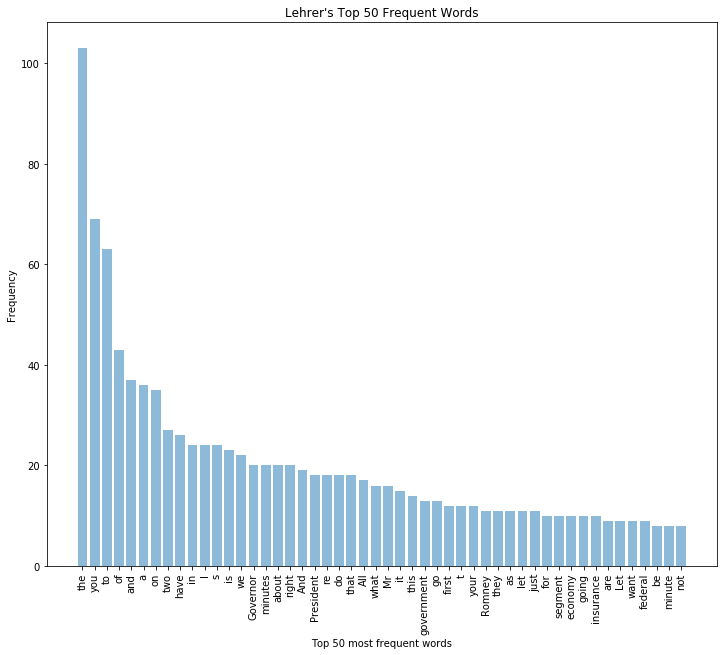

In [88]:
# Plotting top 50 most frequent words by each speaker
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, word_count_lehrer, align='center', alpha=0.5)
plt.xticks(y_pos, word_lehrer, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 most frequent words')
plt.title('Lehrer\'s Top 50 Frequent Words')

### Observations from the plots
1. The most frequent word for each speaker is the article 'the' - a stopword.
2. The plots each show somewhat exponential decay.
3. Most of these frequent words do not carry unique information which might give insights into the speeches, few do.
4. Obama frequently refers to 'Governor' and 'Romney' in his speech, while Romney refers to 'president' and 'government'. Lehrer refers to both these pairs of words.
5. Obama is the only one with 'because' in the most occuring words - showing he is explaining things more.

# Corollary of Zipf’s Law

One of the corollaries of Zipf’s law is that if you count the number of words that occur just once, twice, three times, etc. in a corpus and plot them, you see a similar distribution to that above. This is because there are lots of words that occur just once, a few less that occur twice, even less that occur three times, etc. For example, here is a plot of this from some data.


For example, the most frequent word (word rank = 1) generally occurs twice as many times as the second most frequent word (word rank = 2), etc. The graph below shows a sample graph of the word frequencies, sorted by rank/frequency, from Reuters (NLTK corpus):

<img src="zipf_corollary.png">

Here the x-axis represents the words that occur x times in the corpus. For example, in the graph there are just a few hundred words that occur 50 times in the corpus (i.e. y ∼ 200 where x = 50). We see from the graph, that there are lots of words that occur just a few times and very few words that are occur many times.

## Visualizing the corollary from the debate data

In [89]:
# Taking sum of all speaker's data and then taking unique words from them
speaker_words = obama_words + romney_words
speaker_words = speaker_words + lehrer_words

In [90]:
# Word counters for all speaker
counts_speaker = Counter(speaker_words)

In [91]:
# Placeholders for frequent words data
word_speaker = []
word_count_speaker = []

In [92]:
# Getting the top most used words from all speakers
for key,value in counts_speaker.most_common():
    word_speaker.append(key)
    word_count_speaker.append(value)
    if len(word_count_speaker) >= 50:
        break

Text(0.5,1,"All Speakers' Top 50 Frequent Words")

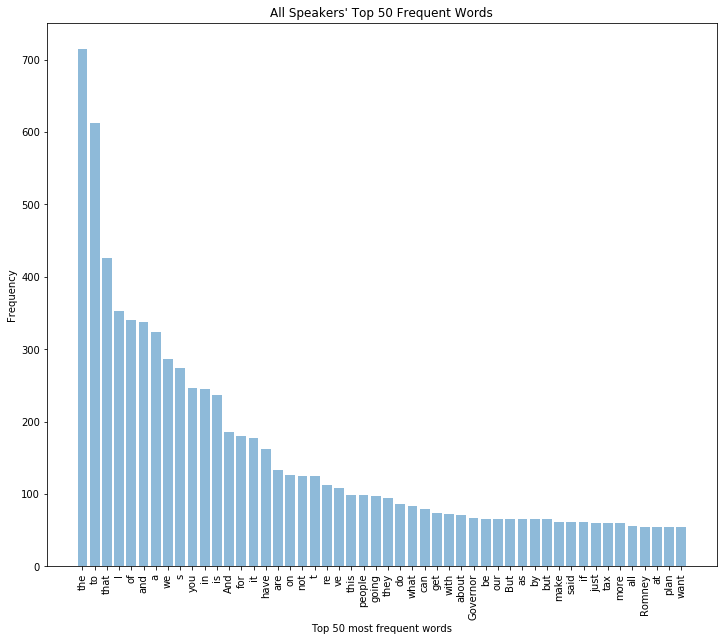

In [93]:
# Plotting top 50 most frequent words by all speakers
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, word_count_speaker, align='center', alpha=0.5)
plt.xticks(y_pos, word_speaker, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 most frequent words')
plt.title('All Speakers\' Top 50 Frequent Words')

### Observations:
1. Again, the most frequent used word is 'the', which is a direct result of the word being used by each speaker.
2. Taken as a whole the most frequent words arre again the ones which do not carry much unique information for insight building.
3. The distribution shows a better exponential decay-like quality.

# Zipf's Law with bigrams


In [96]:
bgrams_obama = list(nltk.bigrams(obama_words))
bgrams_romney = list(nltk.bigrams(romney_words))

In [98]:
counts_bgram_obama = Counter(bgrams_obama)
counts_bgram_romney = Counter(bgrams_romney)

In [100]:
word_bgram_obama = []
word_count_bgram_obama = []
word_bgram_romney = []
word_count_bgram_romney = []

# Getting the top most used words from all speakers
for key,value in counts_bgram_obama.most_common():
    word_bgram_obama.append(key)
    word_count_bgram_obama.append(value)
    if len(word_count_bgram_obama) >= 10:
        break
for key,value in counts_bgram_romney.most_common():
    word_bgram_romney.append(key)
    word_count_bgram_romney.append(value)
    if len(word_count_bgram_romney) >= 10:
        break

In [101]:
print(word_bgram_obama)

[('Governor', 'Romney'), ('that', 'we'), ('we', 've'), ('of', 'the'), ('going', 'to'), ('ve', 'got'), ('to', 'make'), ('we', 're'), ('in', 'the'), ('want', 'to')]


In [102]:
print(word_bgram_romney)

[('going', 'to'), ('I', 'm'), ('it', 's'), ('don', 't'), ('to', 'have'), ('That', 's'), ('that', 's'), ('It', 's'), ('the', 'president'), ('in', 'the')]


Text(0.5,1,"Obama's Top 10 Frequent Words")

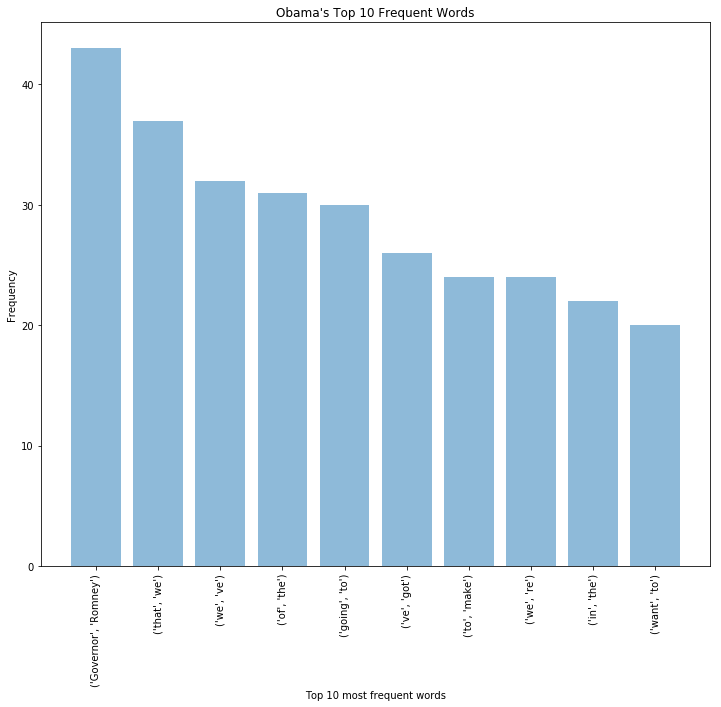

In [104]:
# Plotting top 10 most frequent words by all speakers
y_pos = np.arange(10)
plt.figure(figsize=(12,10))
plt.bar(y_pos, word_count_bgram_obama, align='center', alpha=0.5)
plt.xticks(y_pos, word_bgram_obama, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 10 most frequent words')
plt.title('Obama\'s Top 10 Frequent Words')

Text(0.5,1,"Romney's Top 10 Frequent Words")

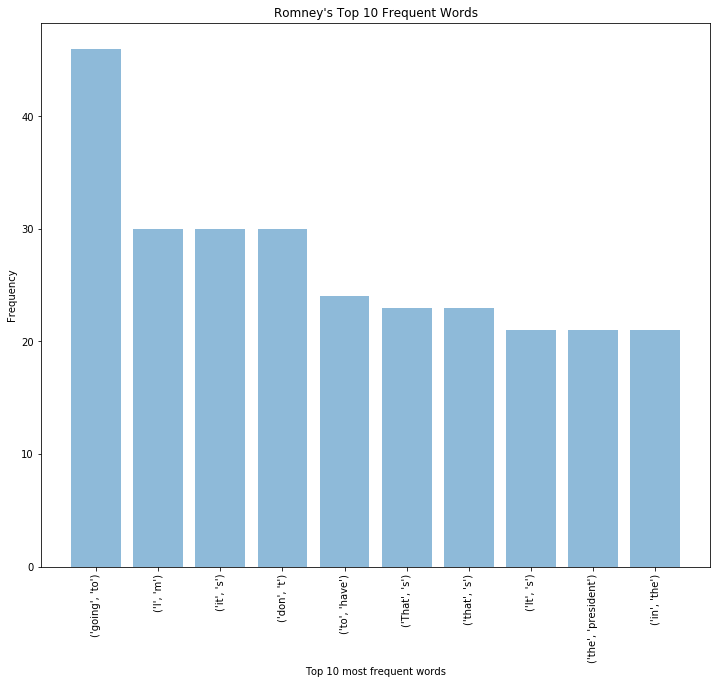

In [105]:
# Plotting top 10 most frequent words by all speakers
y_pos = np.arange(10)
plt.figure(figsize=(12,10))
plt.bar(y_pos, word_count_bgram_romney, align='center', alpha=0.5)
plt.xticks(y_pos, word_bgram_romney, rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 10 most frequent words')
plt.title('Romney\'s Top 10 Frequent Words')

### Observations:
1. the most common bigrams are the ones most commonly used.
2. The frequency plot follows exponential decay but on a lesser scale.